In [1]:
import pandas as pd 
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
# import pydotplus
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn import mixture



/opt/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [2]:
data=pd.read_csv("final-crop.csv")

In [3]:
data=data.drop(columns=['Unnamed: 0','Region'])

In [4]:
data.head()

,Crop,Sowing Time,Min Temp,Max Temp,Soil pH,Soil Type,Min Rainfall,Max Rainfall
0,bajra,jun,20,31,6.0,black cotton soil,25.0,60.0
1,bajra,jul,20,31,6.0,black cotton soil,25.0,60.0
2,bajra,jan,20,31,6.0,black cotton soil,25.0,60.0
3,bajra,feb,20,31,6.0,black cotton soil,25.0,60.0
4,bajra,mar,20,31,6.0,black cotton soil,25.0,60.0


In [5]:
data.columns

Index(['Crop', 'Sowing Time', 'Min Temp', 'Max Temp', 'Soil pH', 'Soil Type',
       'Min Rainfall', 'Max Rainfall'],
      dtype='object')

In [6]:
data.head()

,Crop,Sowing Time,Min Temp,Max Temp,Soil pH,Soil Type,Min Rainfall,Max Rainfall
0,bajra,jun,20,31,6.0,black cotton soil,25.0,60.0
1,bajra,jul,20,31,6.0,black cotton soil,25.0,60.0
2,bajra,jan,20,31,6.0,black cotton soil,25.0,60.0
3,bajra,feb,20,31,6.0,black cotton soil,25.0,60.0
4,bajra,mar,20,31,6.0,black cotton soil,25.0,60.0


In [7]:
data['Crop']=data['Crop'].str.lower()
data['Sowing Time']=data['Sowing Time'].str.lower()
# data['Region']=data['Region'].str.lower()
data['Soil Type']=data['Soil Type'].str.lower()


In [8]:
data=data.dropna()

In [9]:
data['Sowing Time']=data['Sowing Time'].str.replace(" ","")
data['Sowing Time']=data['Sowing Time'].str.replace("february","feb")


In [10]:
data['Sowing Time']=data['Sowing Time'].str.replace("feb","february")


In [11]:
data['Sowing Time']=data['Sowing Time'].str.replace("wholeyear","inter")

In [12]:
data['Sowing Time']=data['Sowing Time'].str.replace("inter","yearlong")

In [13]:
data['Sowing Time'].unique()

array(['jun', 'jul', 'jan', 'february', 'mar', 'aug', 'sep', 'oct', 'nov',
       'dec', 'apr', 'may', 'yearlong'], dtype=object)

In [14]:
from sklearn import preprocessing
# le = preprocessing.LabelEncoder()

columns=['Crop','Sowing Time','Soil Type']

for feature in columns:
    print(feature)
    le = preprocessing.LabelEncoder()
    data[feature] = le.fit_transform(data[feature])
#     data[feature] = le.transform(data[feature])
    print(data[feature].head())
        
# data['Crop'].unique()
        
# data

Crop
0    8
1    8
2    8
3    8
4    8
Name: Crop, dtype: int64
Sowing Time
0    6
1    5
2    4
3    3
4    7
Name: Sowing Time, dtype: int64
Soil Type
0    1
1    1
2    1
3    1
4    1
Name: Soil Type, dtype: int64


In [15]:
data['Soil Type'].unique()

array([1, 5, 6, 4, 7, 2, 0, 9, 3, 8])

In [16]:
data

,Crop,Sowing Time,Min Temp,Max Temp,Soil pH,Soil Type,Min Rainfall,Max Rainfall
0,8,6,20,31,6.0,1,25.0,60.0
1,8,5,20,31,6.0,1,25.0,60.0
2,8,4,20,31,6.0,1,25.0,60.0
3,8,3,20,31,6.0,1,25.0,60.0
4,8,7,20,31,6.0,1,25.0,60.0
...,...,...,...,...,...,...,...,...
4919,117,5,10,15,5.5,5,200.0,400.0
4920,117,1,10,15,5.5,5,200.0,400.0
4921,117,11,10,15,5.5,5,200.0,400.0
4922,117,10,10,15,5.5,5,200.0,400.0


In [17]:
from sklearn.model_selection import train_test_split 

In [18]:
def splitdataset(data): 
  
    # Separating the target variable 
    X = data.values[:, 1:] 
    Y = data.values[:, 0] 
  
    # Splitting the dataset into train and test 
    X_train, X_test, y_train, y_test = train_test_split(  
    X, Y, test_size = 0.2, random_state = 100) 
    
    return X, Y, X_train, X_test, y_train, y_test

In [19]:
X, Y, X_train, X_test, y_train, y_test = splitdataset(data) 

In [20]:
X_train

array([[  3.,  15.,  21., ...,   2.,  38.,  50.],
       [  9.,  24.,  32., ...,   9.,  60.,  90.],
       [ 11.,  25.,  32., ...,   5., 110., 150.],
       ...,
       [  2.,  25.,  30., ...,   5.,  50., 100.],
       [  6.,  20.,  30., ...,   4.,  25.,  55.],
       [  2.,  18.,  30., ...,   5.,  25., 100.]])

In [21]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)

Y_prediction_RF = random_forest.predict(X_test)

random_forest.score(X_train, y_train)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)
print(acc_random_forest)

98.93


In [22]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

Y_pred_LR = logreg.predict(X_test)

acc_log = round(logreg.score(X_train, y_train) * 100, 2)
print(acc_log)

70.37


In [23]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train) 
Y_pred_KNN = knn.predict(X_test)
acc_knn = round(knn.score(X_train, y_train) * 100, 2)
print(acc_knn)

98.68


In [24]:
gaussian = GaussianNB()
gaussian.fit(X_train, y_train) 
Y_pred_GNB = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, y_train) * 100, 2)
print(acc_gaussian)

98.88


In [25]:
linear_svc = LinearSVC()
linear_svc.fit(X_train, y_train)

Y_pred_SVC = linear_svc.predict(X_test)

acc_linear_svc = round(linear_svc.score(X_train, y_train) * 100, 2)
print(acc_linear_svc)

13.05


In [26]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
Y_pred_DT = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)
print(acc_decision_tree)

98.93


In [29]:
#plotting the accuracy comparision 

In [37]:
models= ['RF','LGR','KNN','GNB','LSVC','DT','ENSEMBLE']

accuracy = [acc_random_forest,acc_log,acc_knn,acc_gaussian,acc_linear_svc,acc_decision_tree,ensemble_ans]

In [38]:
graphdata={'models':models, 'accuracy':accuracy}

graph=pd.DataFrame(graphdata)

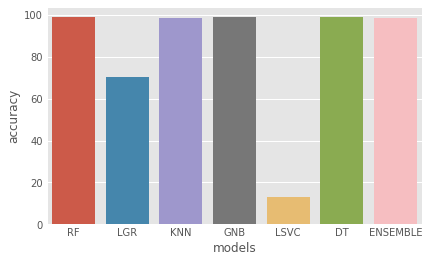

In [39]:
import seaborn as sns

sns.barplot(x=graph['models'],y=graph['accuracy'])

In [27]:
# GMM 

gmm=mixture.GaussianMixture()
gmm.fit(X_train,y_train)
Y_pred=gmm.predict(X_test)
acc_gmm=round(gmm.score(X_train,y_train)*100,2)
print(acc_gmm)
X_train

-2278.2


array([[  3.,  15.,  21., ...,   2.,  38.,  50.],
       [  9.,  24.,  32., ...,   9.,  60.,  90.],
       [ 11.,  25.,  32., ...,   5., 110., 150.],
       ...,
       [  2.,  25.,  30., ...,   5.,  50., 100.],
       [  6.,  20.,  30., ...,   4.,  25.,  55.],
       [  2.,  18.,  30., ...,   5.,  25., 100.]])

In [27]:
from sklearn.ensemble import VotingClassifier

In [28]:
estimators=[('rf', random_forest),('GNB', gaussian),('DT', decision_tree),('KNN', knn)]

In [30]:
ensemble = VotingClassifier(estimators, voting='hard')

In [31]:
ensemble.fit(X_train, y_train)

VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(bootstrap=True,
                                                     class_weight=None,
                                                     criterion='gini',
                                                     max_depth=None,
                                                     max_features='auto',
                                                     max_leaf_nodes=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,
                                                     n_estimators=100,
                                                     n_jobs=None,
          

In [36]:
ensemble_ans=100*ensemble.score(X_test, y_test)
print(ensemble_ans)

98.47715736040608


In [33]:
import pickle

In [34]:
pickle.dump(ensemble,open("ensemble.pkl","wb"))

In [0]:
from sklearn.ensemble import VotingClassifier

model_hard = VotingClassifier(estimators=[('rf',random_forest),('GNB', gaussian),('DT', decision_tree),('KNN', knn)], voting='hard')


In [29]:
model_hard.fit(X_train,y_train)
# model.score(X_test,y_test)

VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='gini',
                                                     max_depth=None,
                                                     max_features='auto',
                                                     max_leaf_nodes=None,
                                                     max_samples=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,
        

In [0]:
ans_pred=model_hard.predict(X_test)

In [31]:
score_ensemble = accuracy_score(y_test, ans_pred)*100
score_ensemble 

98.47715736040608

In [0]:
model_soft = VotingClassifier(estimators=[('rf',random_forest), ('LR', logreg),('GNB', gaussian),('DT', decision_tree),('KNN', knn)], voting='soft')

In [33]:
model_soft.fit(X_train,y_train)
ans_soft=model_soft.predict(X_test)
score_ensemble_soft = ((accuracy_score(y_test, ans_soft)) *100)
score_ensemble_soft

98.68020304568527

In [0]:
from sklearn import preprocessing

In [0]:
normalized = preprocessing.normalize(data)

In [36]:
normalized

array([[0.10574945, 0.07931209, 0.26437362, ..., 0.01321868, 0.33046703,
        0.79312087],
       [0.10585122, 0.06615702, 0.26462806, ..., 0.0132314 , 0.33078508,
        0.79388419],
       [0.10593471, 0.05296736, 0.26483679, ..., 0.01324184, 0.33104598,
        0.79451036],
       ...,
       [0.25280521, 0.02376801, 0.02160728, ..., 0.01080364, 0.43214565,
        0.8642913 ],
       [0.2528176 , 0.02160834, 0.02160834, ..., 0.01080417, 0.43216684,
        0.86433367],
       [0.25282881, 0.01944837, 0.0216093 , ..., 0.01080465, 0.43218601,
        0.86437202]])

In [0]:
normal=pd.DataFrame(normalized)

In [0]:
def splitdataset(normal): 
  
    # Separating the target variable 
    X = normal.values[:, 1:] 
    Y = normal.values[:, 0] 
  
    # Splitting the dataset into train and test 
    X_train, X_test, y_train, y_test = train_test_split(  
    X, Y, test_size = 0.2, random_state = 100) 
    
    return X, Y, X_train, X_test, y_train, y_test

In [0]:
X1, Y1, X1_train, X1_test, y1_train, y1_test = splitdataset(normal) 

In [40]:
normal

,0,1,2,3,4,5,6,7
0,0.105749,0.079312,0.264374,0.409779,0.079312,0.013219,0.330467,0.793121
1,0.105851,0.066157,0.264628,0.410173,0.079388,0.013231,0.330785,0.793884
2,0.105935,0.052967,0.264837,0.410497,0.079451,0.013242,0.331046,0.794510
3,0.106000,0.039750,0.264999,0.410749,0.079500,0.013250,0.331249,0.794998
4,0.105630,0.092426,0.264074,0.409314,0.079222,0.013204,0.330092,0.792222
...,...,...,...,...,...,...,...,...
4919,0.252862,0.010806,0.021612,0.032418,0.011887,0.010806,0.432243,0.864485
4920,0.252876,0.002161,0.021613,0.032420,0.011887,0.010807,0.432267,0.864534
4921,0.252805,0.023768,0.021607,0.032411,0.011884,0.010804,0.432146,0.864291
4922,0.252818,0.021608,0.021608,0.032413,0.011885,0.010804,0.432167,0.864334


In [41]:
X1_train

array([[0.04220227, 0.21101137, 0.29541592, ..., 0.02813485, 0.53456215,
        0.70337125],
       [0.05846252, 0.15590004, 0.20786672, ..., 0.05846252, 0.3897501 ,
        0.58462516],
       [0.05015503, 0.11398871, 0.14590554, ..., 0.02279774, 0.50155031,
        0.68393224],
       ...,
       [0.0147281 , 0.18410119, 0.22092143, ..., 0.03682024, 0.36820239,
        0.73640478],
       [0.08242443, 0.27474809, 0.41212213, ..., 0.05494962, 0.34343511,
        0.75555724],
       [0.0180744 , 0.1626696 , 0.27111601, ..., 0.045186  , 0.22593001,
        0.90372003]])

In [0]:
import numpy as np
from sklearn import linear_model
from sklearn import svm

classifiers = [
    svm.SVR(),
    linear_model.SGDRegressor(),
    linear_model.BayesianRidge(),
    linear_model.LassoLars(),
    linear_model.ARDRegression(),
    linear_model.PassiveAggressiveRegressor(),
    linear_model.TheilSenRegressor(),
    linear_model.LinearRegression()]

In [43]:
for item in classifiers:
    print(item)
    clf = item
    clf.fit(X1_train, y1_train)
    (clf.predict(X1_test))
    acc_random_forest = round(clf.score(X1_train, y1_train) * 100, 2)
    print(acc_random_forest)
    

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
91.38
SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)
52.25
BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, alpha_init=None,
              compute_score=False, copy_X=True, fit_intercept=True,
              lambda_1=1e-06, lambda_2=1e-06, lambda_init=None, n_iter=300,
              normalize=False, tol=0.001, verbose=False)
74.79
LassoLars(alpha=1.0, copy_X=True, eps=2.220446049250313e-16, fit_intercept=True,
          fit_path=True, max_iter=500, normalize=True, positive=False,
          precompute=

In [0]:
import pickle
pickle.dump(model_hard,open("vote.pkl","wb"))
pickle.dump(knn,open("knn_new.pkl","wb"))

In [0]:
from google.colab import files
files.download('vote.pkl')
files.download('knn_new.pkl')